[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1.]


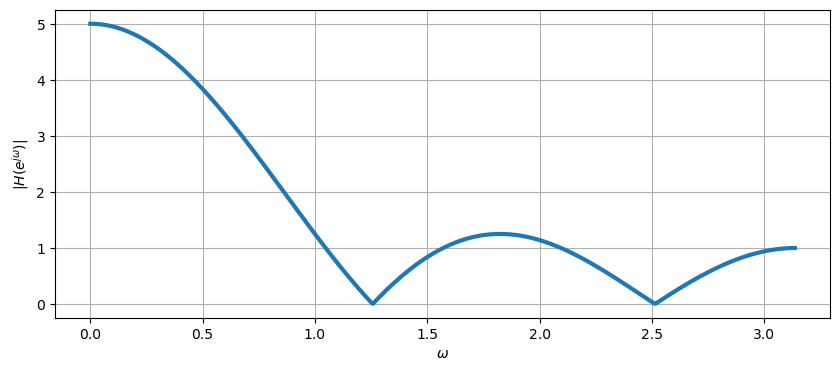

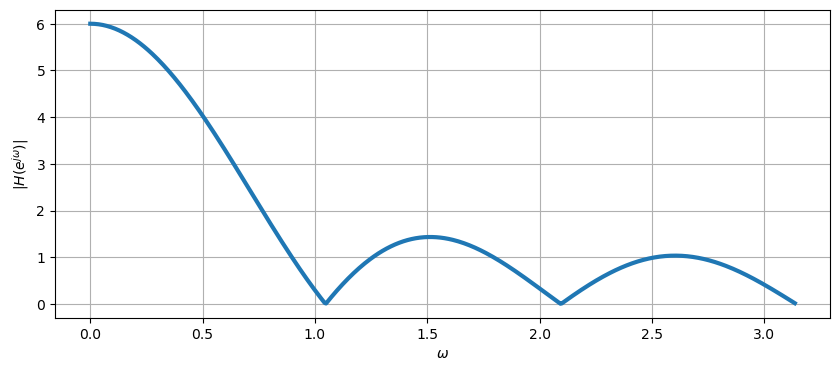

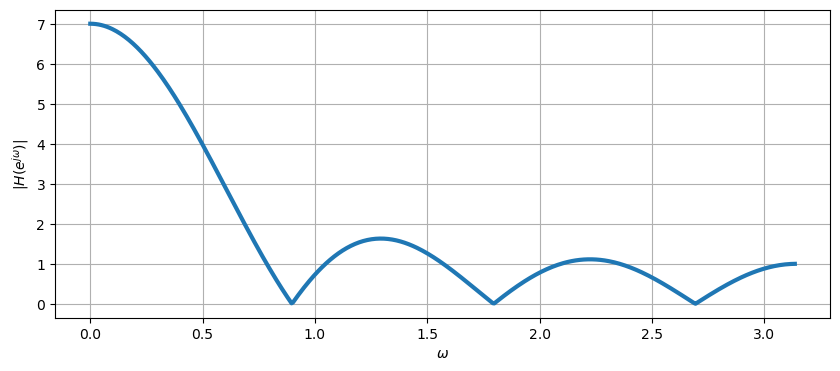

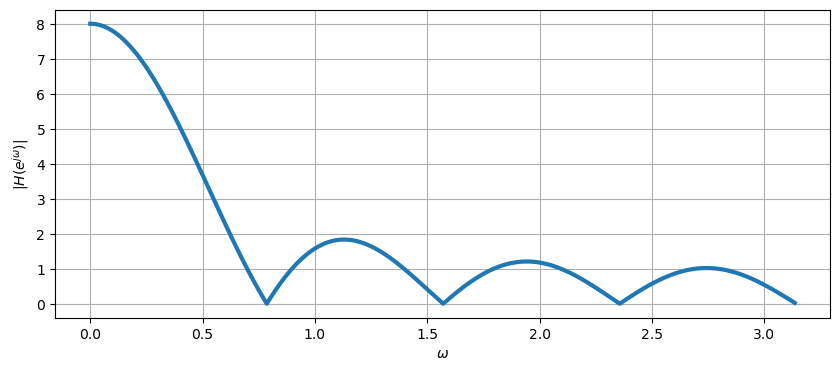

In [6]:
# zkouska  2024-25 - 1op  
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, freqs, decimate, convolve2d 

# --- 2 filtr --- 
h = np.ones(5); om,H = freqz(h,[1],512); print (h)
fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
h = np.ones(6); om,H = freqz(h,[1],512); print (h)
fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
h = np.ones(7); om,H = freqz(h,[1],512); print (h)
fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
h = np.ones(8); om,H = freqz(h,[1],512); print (h)
fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
#fig.savefig('fig/3_1f.eps',bbox_inches='tight')


(0.6363961030678928+0.6363961030678927j) (0.6363961030678928-0.6363961030678927j) [ 1.         -1.27279221  0.81      ]
(0.5656854249492381+0.565685424949238j) (0.5656854249492381-0.565685424949238j) [ 1.         -1.13137085  0.64      ]
(5.5109105961630896e-17+0.9j) (5.5109105961630896e-17-0.9j) [ 1.00000000e+00 -1.10218212e-16  8.10000000e-01]
(-0.6363961030678927+0.6363961030678928j) (-0.6363961030678927-0.6363961030678928j) [1.         1.27279221 0.81      ]


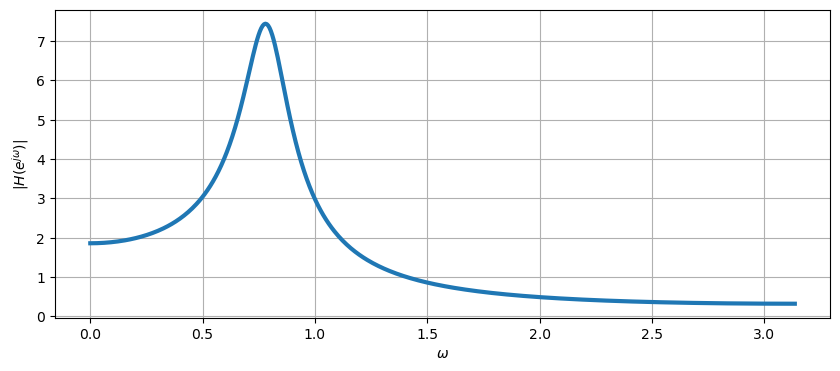

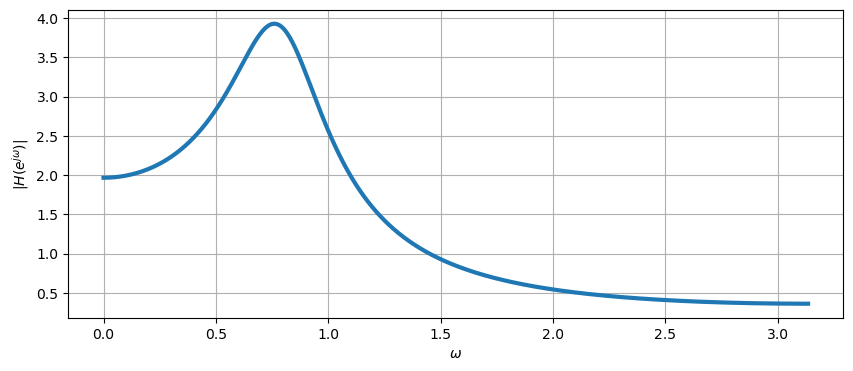

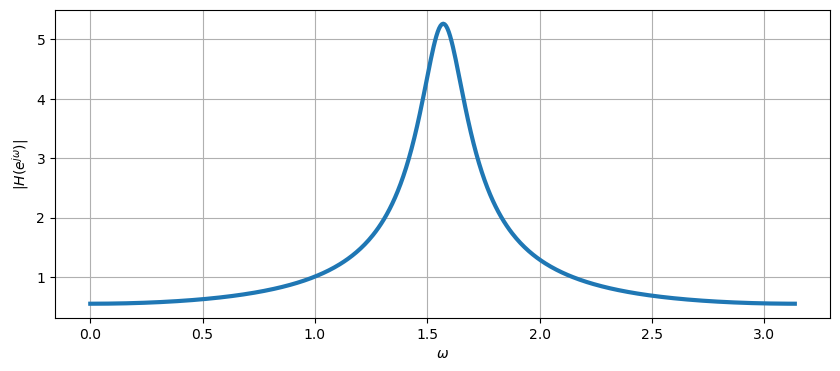

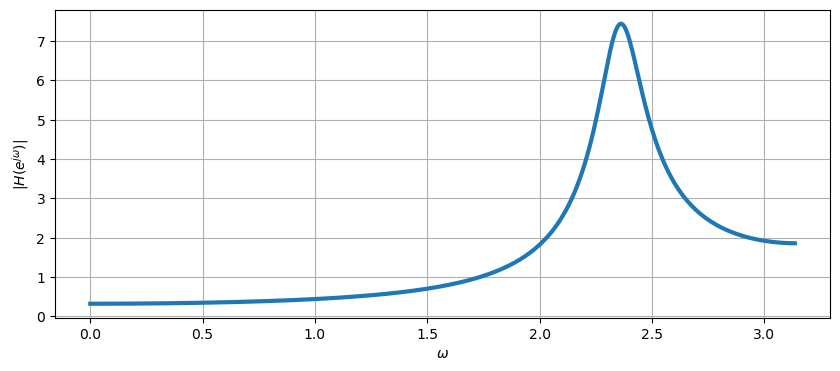

In [7]:
# ---- 3 poly ----- 
om = np.pi / 4; p1 = 0.9 * np.exp(1j * om); p2 = np.conj(p1); 
a = np.poly([p1,p2]); print (p1,p2,a); 
om,H = freqz([1],a,512); fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
om = np.pi / 4; p1 = 0.8 * np.exp(1j * om); p2 = np.conj(p1); 
a = np.poly([p1,p2]); print (p1,p2,a); 
om,H = freqz([1],a,512); fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
om = np.pi / 2; p1 = 0.9 * np.exp(1j * om); p2 = np.conj(p1); 
a = np.poly([p1,p2]); print (p1,p2,a); 
om,H = freqz([1],a,512); fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
om = 3 * np.pi / 4; p1 = 0.9 * np.exp(1j * om); p2 = np.conj(p1); 
a = np.poly([p1,p2]); print (p1,p2,a); 
om,H = freqz([1],a,512); fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()

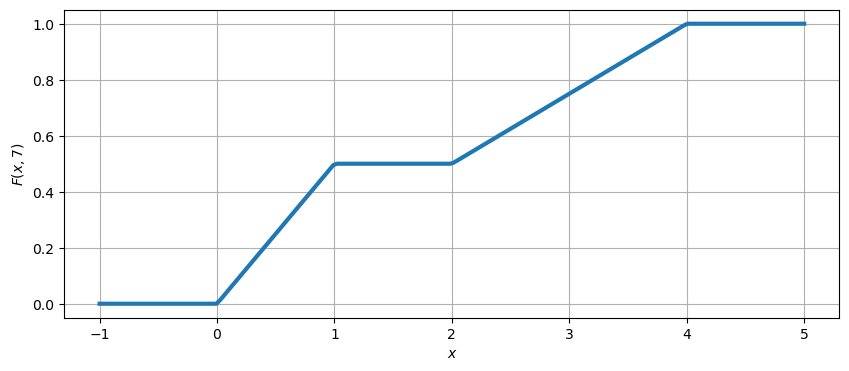

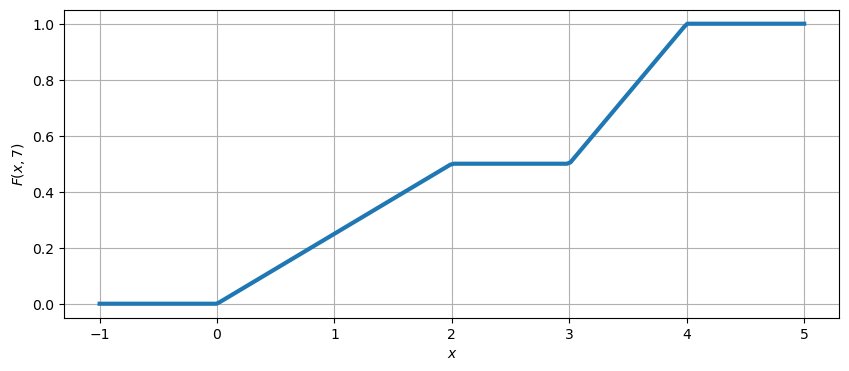

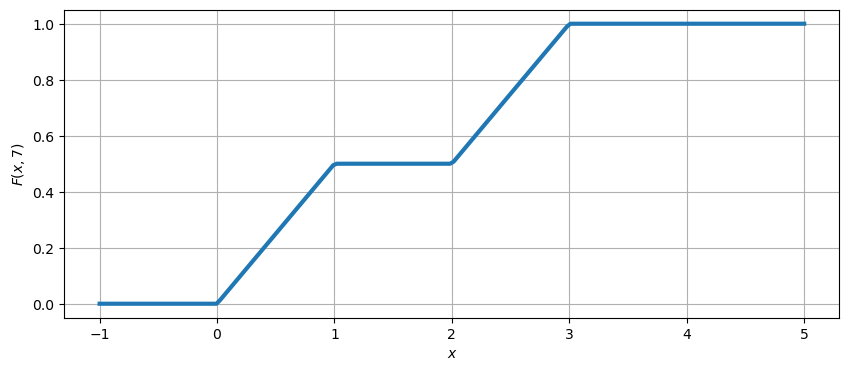

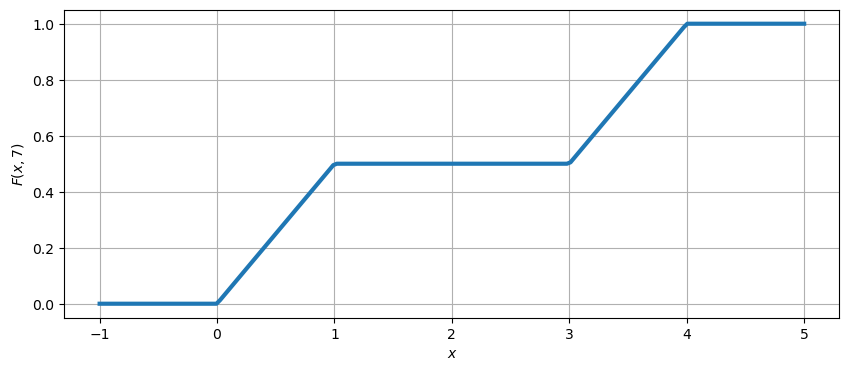

In [13]:
# ---- distrib to PDF -------
def Fx(a1, a2, b, c1, c2, d):  # kresli Fx se dvema zvysenimi .,.. 
    x = np.linspace(-1,5,200); Fx = np.zeros(x.size); 
    ii = np.where((x >= a1) & (x < a2)); Fx[ii] = (x[ii] - a1) * b
    ii = np.where((x >= a2) & (x < c1)); Fx[ii] = 0.5
    ii = np.where((x >= c1) & (x < c2)); Fx[ii] = 0.5 + (x[ii] - c1) * d
    ii = np.where(x >= c2); Fx[ii] = 1
    fig=plt.figure(figsize=(10,4)); plt.plot(x, Fx, linewidth=3); 
    fig.gca().set_xlabel('$x$'); fig.gca().set_ylabel('$F(x,7)$'); fig.gca().grid()
    return fig

f=Fx(0, 1, 0.5, 2, 4, 0.25)
f.savefig('fig/6_1.eps',bbox_inches='tight')
f=Fx(0, 2, 0.25, 3, 4, 0.5)
f.savefig('fig/6_2.eps',bbox_inches='tight')
f=Fx(0, 1, 0.5, 2, 3, 0.5)
f.savefig('fig/6_3.eps',bbox_inches='tight')
f=Fx(0, 1, 0.5, 3, 4, 0.5)
f.savefig('fig/6_4.eps',bbox_inches='tight')


In [9]:
# ---------- 10 kvantovani ... protozeneumim pocitat ...
b = np.arange(5,9)
SNR = b * 6 + 1.76
print (b,SNR) 


[5 6 7 8] [31.76 37.76 43.76 49.76]


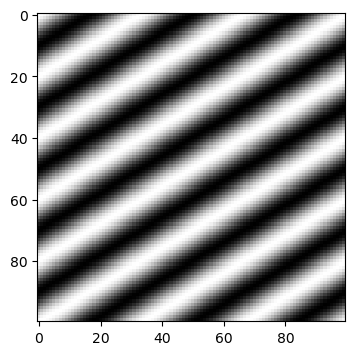

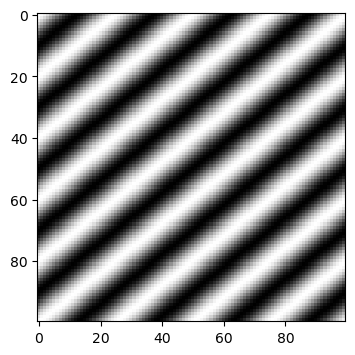

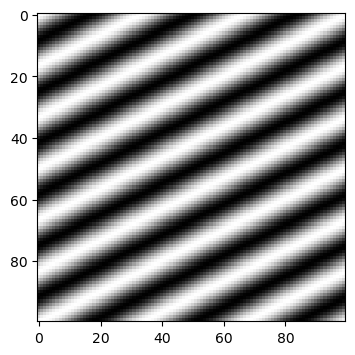

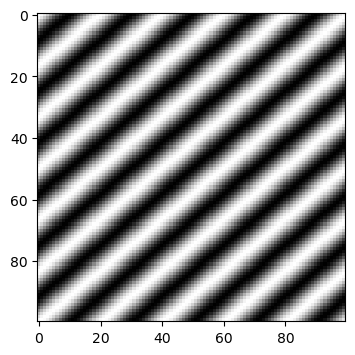

In [12]:
# --- 13 obrazky ---
# --- 8 base 2D dft ---jedeme jen realnou ! \n",
def stripes(m,n): 
    kall = np.arange(100)
    a = 0.5 + 0.5 * np.cos(2 * np.pi * (np.outer(m * kall / 100,np.ones(100)) + np.outer(np.ones(100),n * kall / 100)))
    fig=plt.figure(figsize=(4,4)); plt.imshow(a, 'gray', vmin=0, vmax=1); 
    return fig;
f = stripes(5,3); f.savefig('fig/13_1.eps')
f = stripes(5,4); f.savefig('fig/13_2.eps')
f = stripes(6,3); f.savefig('fig/13_3.eps')
f = stripes(6,5); f.savefig('fig/13_4.eps')
   

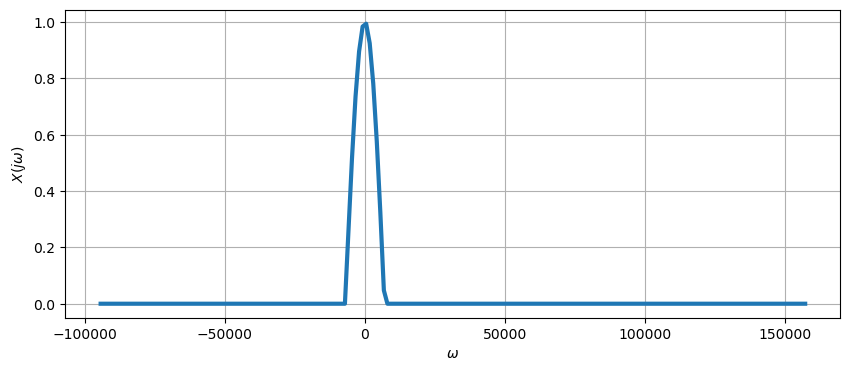

In [11]:
# ---- 20 spec function ==== 
f = np.linspace(-15000, 25000, 200)
om = 2 * np.pi * f; X = np.zeros(om.size); 
ggg = 7000; ii = np.where((om>-ggg) & (om<ggg)); 
X[ii] = np.cos(np.pi * om[ii] / 2 / ggg)
fig=plt.figure(figsize=(10,4)); plt.plot(om, X, linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$X(j\omega)$'); fig.gca().grid()
fig.savefig('fig/20.eps',bbox_inches='tight')